# 1. Stock Prediction :
## Take stock price of any company you want and predicts its price by using LSTM.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
pip install keras

In [4]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [6]:
# yf.download() function to download stock data using the yfinance library in Python. The yf.download() function allows you to download historical stock data for one or more stock symbols.
import yfinance as yf

In [7]:
# A stock symbol, also known as a ticker symbol, is a unique series of letters assigned to a publicly traded company's stock.
stock_symbol = 'GAIL.NS'

In [8]:
#last 5 years data with interval of 1 day
data = yf.download(tickers=stock_symbol,period='5y',interval='1d')

[*********************100%***********************]  1 of 1 completed


In [9]:
# head function is used to show first 5 rows by default
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-07-16,118.933334,119.833336,116.766663,118.599998,94.274284,8057787
2018-07-17,119.333336,122.116669,119.000000,119.566666,95.042686,10419621
2018-07-18,120.183334,121.849998,118.433334,119.683334,95.135414,10709484
2018-07-19,120.133331,121.349998,118.583336,119.266663,94.804207,5064312
2018-07-20,119.599998,120.933334,119.216667,119.933334,95.334137,5851905


In [10]:
data.shape

(1234, 6)

<Axes: xlabel='Date'>

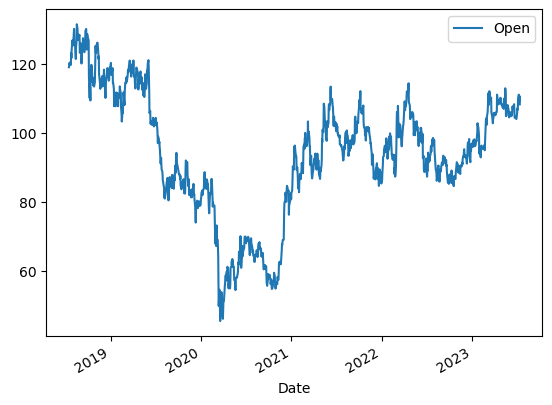

In [11]:
# plotting a graph for open prices of the stock in a particular year or with respect to year.
opn = data[['Open']]
opn.plot()

In [12]:
ds = opn.values
ds

array([[118.93333435],
       [119.33333588],
       [120.18333435],
       ...,
       [109.        ],
       [110.59999847],
       [108.19999695]])

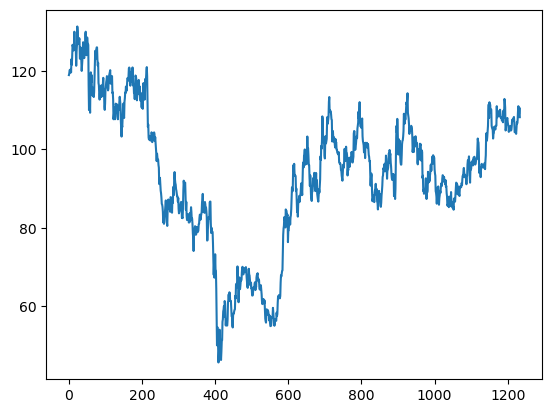

In [13]:
plt.plot(ds)

In [14]:
from sklearn.preprocessing import MinMaxScaler
#Using MinMaxScaler for normalizing data between 0 & 1
normalizer = MinMaxScaler(feature_range=(0,1))
ds_scaled = normalizer.fit_transform(np.array(ds).reshape(-1,1))

In [15]:
len(ds_scaled), len(ds)

(1234, 1234)

In [16]:
#Defining test and train data sizes
train_size = int(len(ds_scaled)*0.80)
test_size = len(ds_scaled) - train_size
train_size,test_size

(987, 247)

In [17]:
#Splitting data between train and test
ds_train, ds_test = ds_scaled[0:train_size,:], ds_scaled[train_size:len(ds_scaled),:1]
len(ds_train),len(ds_test)

(987, 247)

In [18]:
#creating dataset in time series for LSTM model 
#X[100,120,140,160,180] : Y[200]
def create_ds(dataset,step=1):
    Xtrain, Ytrain = [], []
    for i in range(len(dataset)-step-1):
        a = dataset[i:(i+step), 0]
        Xtrain.append(a)
        Ytrain.append(dataset[i + step, 0])
    return np.array(Xtrain), np.array(Ytrain)
#Taking 100 days price as one record for training
time_stamp = 100
X_train, y_train = create_ds(ds_train,time_stamp)
X_test, y_test = create_ds(ds_test,time_stamp)

In [19]:
X_train.shape,y_train.shape

((886, 100), (886,))

In [20]:
X_test.shape, y_test.shape

((146, 100), (146,))

In [21]:
#Reshaping data to fit into LSTM model
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [22]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [23]:
#Creating LSTM model using keras
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(units=50,return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1,activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
#Training model with adam optimizer and mean squared error loss function
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64)

Epoch 1/100
14/14 [==============================] - 15s 441ms/step - loss: 0.0964 - val_loss: 0.0235
Epoch 2/100
14/14 [==============================] - 4s 290ms/step - loss: 0.0149 - val_loss: 0.0027
Epoch 3/100
14/14 [==============================] - 5s 333ms/step - loss: 0.0084 - val_loss: 0.0025
Epoch 4/100
14/14 [==============================] - 4s 293ms/step - loss: 0.0056 - val_loss: 0.0038
Epoch 5/100
14/14 [==============================] - 4s 274ms/step - loss: 0.0046 - val_loss: 0.0029
Epoch 6/100
14/14 [==============================] - 4s 278ms/step - loss: 0.0044 - val_loss: 0.0020
Epoch 7/100
14/14 [==============================] - 4s 285ms/step - loss: 0.0043 - val_loss: 0.0020
Epoch 8/100
14/14 [==============================] - 4s 290ms/step - loss: 0.0041 - val_loss: 0.0017
Epoch 9/100
14/14 [==============================] - 4s 300ms/step - loss: 0.0040 - val_loss: 0.0016
Epoch 10/100
14/14 [==============================] - 4s 275ms/step - loss: 0.0040 - val_l

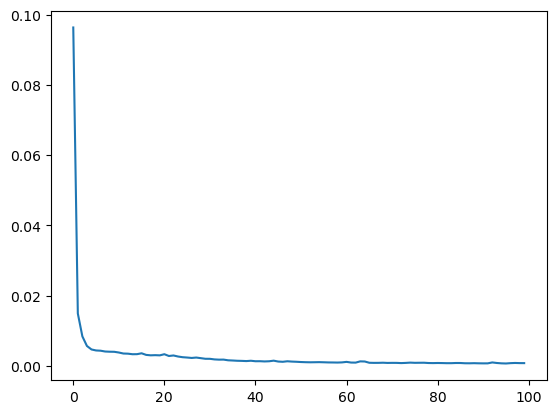

In [25]:
#PLotting loss, it shows that loss has decreased significantly and model trained well
loss = model.history.history['loss']
plt.plot(loss)

In [26]:
#Predicitng on train and test data
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

5/5 [==============================] - 0s 61ms/step


In [27]:
#Inverse transform to get actual value
train_predict = normalizer.inverse_transform(train_predict)
test_predict = normalizer.inverse_transform(test_predict)

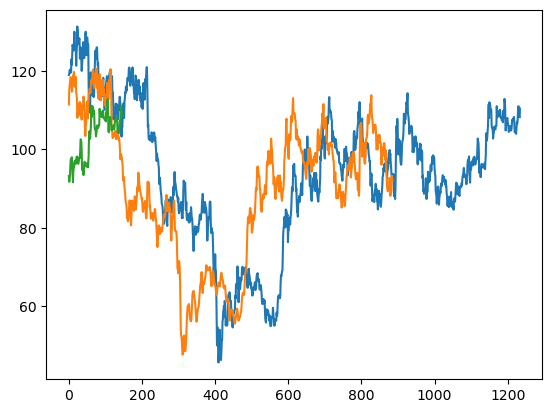

In [28]:
#Comparing using visuals
plt.plot(normalizer.inverse_transform(ds_scaled))
plt.plot(train_predict)
plt.plot(test_predict)

In [29]:
type(train_predict)

numpy.ndarray

In [30]:
test = np.vstack((train_predict,test_predict))

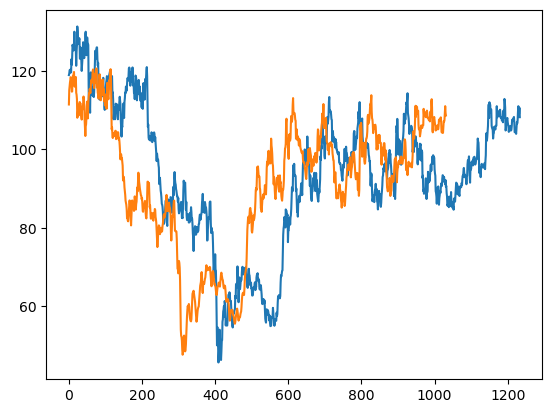

In [31]:
#Combining the predited data to create uniform data visualization
plt.plot(normalizer.inverse_transform(ds_scaled))
plt.plot(test)

In [32]:
len(ds_test)

247

In [33]:
#Getting the last 100 days records
fut_inp = ds_test[147:]

In [34]:
fut_inp = fut_inp.reshape(1,-1)

In [35]:
tmp_inp = list(fut_inp)

In [36]:

fut_inp.shape

(1, 100)

In [37]:
#Creating list of the last 100 data
tmp_inp = tmp_inp[0].tolist()

In [38]:
#Predicting next 30 days price suing the current data
#It will predict in sliding window manner (algorithm) with stride 1
lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(tmp_inp)>100):
        fut_inp = np.array(tmp_inp[1:])
        fut_inp=fut_inp.reshape(1,-1)
        fut_inp = fut_inp.reshape((1, n_steps, 1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        tmp_inp = tmp_inp[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        fut_inp = fut_inp.reshape((1, n_steps,1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[[0.7327301502227783], [0.727890133857727], [0.7266193628311157], [0.7258160710334778], [0.725707471370697], [0.72627854347229], [0.727318286895752], [0.7286232709884644], [0.7300243377685547], [0.731387734413147], [0.7326188087463379], [0.7336604595184326], [0.7344903349876404], [0.7351130247116089], [0.7355531454086304], [0.7358474135398865], [0.73603755235672], [0.7361650466918945], [0.736266553401947], [0.7363719940185547], [0.7365027666091919], [0.7366713881492615], [0.736883819103241], [0.7371392846107483], [0.7374324798583984], [0.7377558350563049], [0.738099992275238], [0.7384558320045471], [0.738814651966095], [0.7391701936721802]]


In [39]:
len(ds_scaled)

1234

In [40]:
#Creating a dummy plane to plot graph one after another
plot_new=np.arange(1,101)
plot_pred=np.arange(101,131)

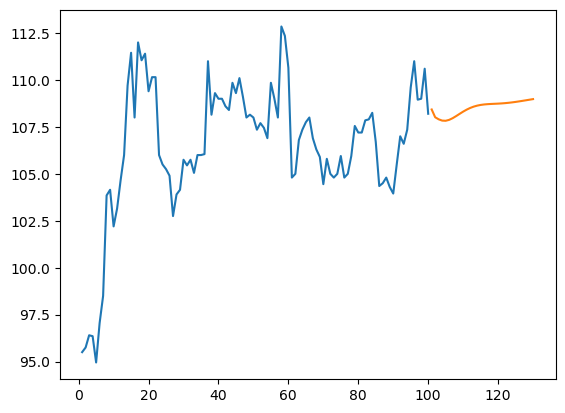

In [41]:
plt.plot(plot_new, normalizer.inverse_transform(ds_scaled[1134:]))
plt.plot(plot_pred, normalizer.inverse_transform(lst_output))

In [42]:
ds_new = ds_scaled.tolist()

In [43]:
len(ds_new)

1234

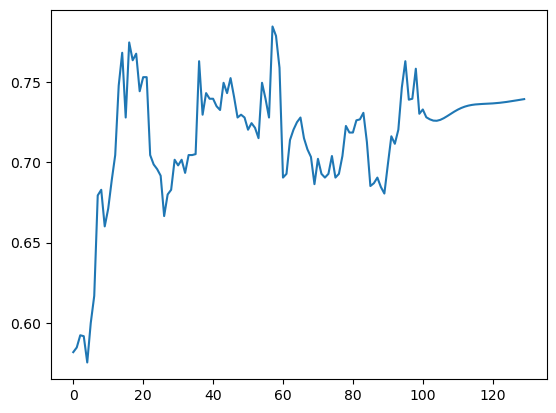

In [44]:
#Entends helps us to fill the missing value with approx value
ds_new.extend(lst_output)
plt.plot(ds_new[1134:])

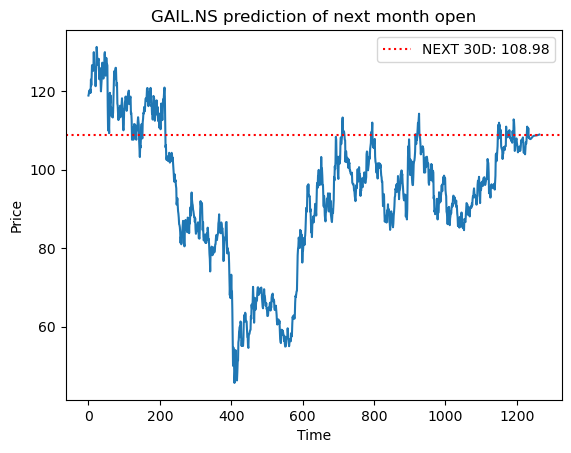

In [45]:
#Creating final data for plotting
final_graph = normalizer.inverse_transform(ds_new).tolist()
#Plotting final results with predicted value after 30 Days
plt.plot(final_graph,)
plt.ylabel("Price")
plt.xlabel("Time")
plt.title("{0} prediction of next month open".format(stock_symbol))
plt.axhline(y=final_graph[len(final_graph)-1], color = 'red', linestyle = ':', label = 'NEXT 30D: {0}'.format(round(float(*final_graph[len(final_graph)-1]),2)))
plt.legend()

In [ ]:
#1134 KI JGAH 1200